<a href="https://colab.research.google.com/github/cthitch137/DESI-Randoms/blob/main/Collin_Hitchcock_InClass_MC__radioactive_decays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Radioactive decays

*Adapted from Matt Bellis*

In one of the first labs of the semester, we used the Euler method to calculate the number of radioactive nuclei that survive at a particular time.  In this notebook, we will use Monte Carlo techniques to simulate the decay of a group of radioactive atoms.

Radioactive decays are a prime example of random processes. The probability for one atom to decay is the same as for every other atom. Even though the decay of any atom is random, we can predict the average number remaining $N$ after some period of time $t$, if we know the starting number of atoms $N_0$ and the *mean lifetime* $\tau$.

$$N(t) = N_0 e^{-t/\tau}$$

So after one mean lifetime, what fraction of atoms remain?

\begin{eqnarray}
N(t=\tau) &=& N_0 e^{-\tau/\tau}\\
          &=& N_0 e^{-1}\\
          &=& \frac{N_0}{e}
\end{eqnarray}

$e$ is about 2.7 so a little less than $\frac{1}{2}$ the atoms remain.

This process is sometimes referred to as *exponential decay*, though the exponential is really describing the number of atoms *remaining*.

Let's make a plot of this function and see what it looks like for $\tau=1$.


In [1]:
# Import the usual suspects
import numpy as np
import matplotlib.pylab as plt

Text(0, 0.5, 'Fraction of N$_0$ remaining')

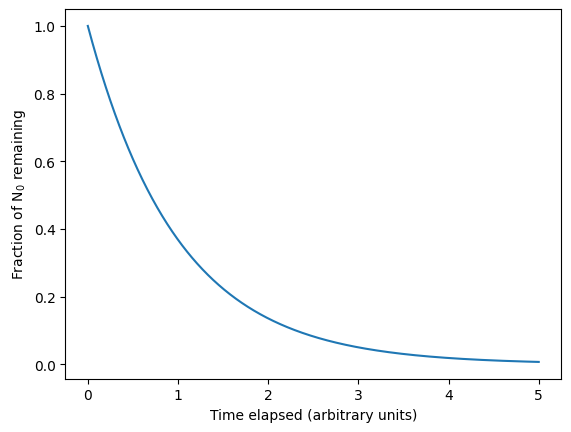

In [3]:
# Demo of exponential process
tau = 1 # This is an arbitrary unit of time

# TODO: create a time array that ranges from 0 to 5 and has 1000 steps
t = np.linspace(0,5,1000) # We'll look at this for 5 units of time


N0 = 1 # This will just represent having 100% of the atoms at t=0

# TODO: enter equation for how N changes with time (see text above)
N = N0/np.e**t

plt.figure()
# TODO: make a plot of the fraction remainng atoms vs time
plt.plot(t,N)  # Make the plot here

plt.xlabel('Time elapsed (arbitrary units)')
plt.ylabel(r'Fraction of N$_0$ remaining')

# Numerical approach

Before we move on, let's first remind ourselves that when a radioactive isotope decays it doesn't actually disappear. It instead turns into another type of atom or isotope. For example, consider $^{14}C$ decay.

$$^{14}C \rightarrow ^{14}N + e^- + \bar{\nu}$$

The carbon decays into nitrogen plus an electron and neutrino, both of which fly out of the sample. You can read more about this particular decay process [here](https://en.wikipedia.org/wiki/Carbon-14). So when I say an atom has *decayed*, I really mean it has turned into another atom (or set of other atoms).

So let's suppose we know the probability of any one atom decaying. Let's try to simulate the decay of 10 atoms.

To keep track of our 10 atoms, let's make an array called isotopes that contains of 10 ones. A value of one (1) means that the atom is still there (again, it doesn't actually disappear, but we know what we mean).


In [5]:
# Our atoms

# TODO: make an array that contains 10 ones
isotopes = np.ones(10)

print(isotopes)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Now we'll define a function ```does_it_decay``` that will "decide" whether or not an atom has decayed. This is almost exactly the same as our previous fair/unfair coin example.

In the code below, I've decided to use a default probability of 0.2, but when you call it, you can pass in whatever you like.

In [22]:
# Our function to decide if an atom has decayed or not.

# TODO: finish function
def does_it_decay(prob=0.2):
  """  Generates a random number. If the number is less than the input probability, the particle decayed.

  INPUTS:
  prob (default=0.2) - Number between 0 and 1

  RETURNS
  True or False
  """

  # draw a random number between zero and 1
  rand_num = np.random.random()

  # if random number is less than or equal to prob, return True
  if rand_num <= prob:
    return True
  # otherwise return False
  else:
    return False

Let's test it out!

In [21]:
# 60% chance of decay
# TODO: create a for loop to call your function 5 times with a 60% chance of decay
# print the results
prob = 0.6
num = 5
print(f"The probability the particle decays is {prob*100}%.")
for i in range(num):
  decay = does_it_decay(prob)
  if decay == True:
    print("The particle decayed.")
  else:
    print("The particle did not decay.")
print()

# 10% chance of decay
# TODO : create a while loop to call your function 5 times with a 10% chance of decay
# print the results
prob = 0.1
num = 5
print(f"The probability the particle decays is {prob*100}%.")
for i in range(num):
  decay = does_it_decay(prob)
  if decay == True:
    print("The particle decayed.")
  else:
    print("The particle did not decay.")
print()

The probability the particle decays is 60.0%.
The particle decayed.
The particle did not decay.
The particle did not decay.
The particle decayed.
The particle decayed.

The probability the particle decays is 10.0%.
The particle did not decay.
The particle did not decay.
The particle did not decay.
The particle did not decay.
The particle did not decay.



OK, let's use this function to decay away our atoms.

At each time step (the units for these time steps are arbitrary right now) we'll loop over each isotope in our array. If the isotope is still there (it has a value of 1) then we'll test to see if it decays. If it *does*, then we'll change that value to a 0.

We'll then repeat the process, testing only remaining (value of 1) isotopes, until they're all gone!

We'll also keep track of the number of isotopes remaining at each time step. Note that we can do this using the ```sum()``` function, which just adds up all the values in the array. Since the decayed ones are 0, they won't contribute to the sum and we'll just have an easy way of counting the remaining ones!

Let's assume the probability of decaying is 20% or 0.2.

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
[1. 0. 1. 0. 1. 1. 1. 0. 1. 1.]
[1. 0. 1. 0. 1. 1. 1. 0. 1. 0.]
[1. 0. 1. 0. 1. 1. 1. 0. 1. 0.]
[1. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
[1. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
[1. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
[1. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
[1. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Text(0, 0.5, 'Number of atoms remaining')

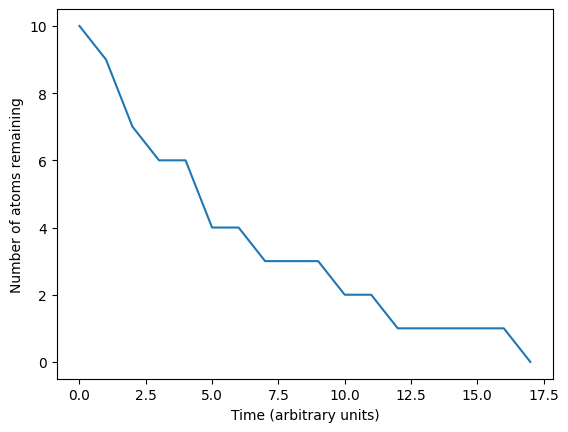

In [28]:
# TODO: Make an array of 10 ones for our isotopes
isotopes = np.ones(10)

# TODO: Create an empty list call N to keep track of the number of isotopes at each time step.
N = []


# TODO: append the initial number of isotopes into the list N
N.append(len(isotopes))


print(isotopes)

# Move forward in time while there is still at least one 1 value in the isotope
# array.

prob = 0.2
while sum(isotopes)>0:

  # Loop over the isotopes
  for i in range(len(isotopes)):

    if isotopes[i] == 1: # Meaning it did not decay yet
      if does_it_decay(prob)==True:
        isotopes[i] = 0

  # Keep track of how many are remaining
  N.append(sum(isotopes))

  # Print out the isotope array at each step.
  # We can see them decaying away!
  print(isotopes)

# TODO: create an array xpts that ranges from 0 to len(N) by steps of 1
xpts = np.arange(0,len(N),1)

plt.figure()

# TODO: plot Number of isotops versus xpts
# choose your favorite marker
plt.plot(xpts,N)
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Number of atoms remaining')

Check out the printed arrays! You can see them vanish and all go to 0!

The plot might look a little jagged. That's because we're only using 10 atoms. What if we tried 1000 atoms!

In the cell below, we will repeat the calculation for 100 atoms.

Text(0, 0.5, 'Number of atoms remaining')

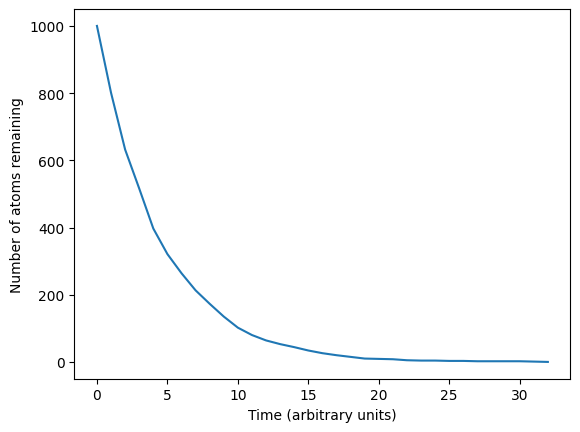

In [30]:
# TODO: Make an array of 1000 ones for our isotopes
isotopes = np.ones(1000)

# TODO: initialize your list N to track the number of isotopes
N = []

# TODO: append the initial number of isotopes
N.append(len(isotopes))

prob = 0.2
while sum(isotopes)>0:

  for i in range(len(isotopes)):

    if isotopes[i] == 1: # Meaning it did not decay yet
      if does_it_decay(prob)==True:
        isotopes[i] = 0

  N.append(sum(isotopes))

# TODO : create a plot of the number of isotopes versus the step number
xpts = np.arange(0,len(N),1)

plt.figure()
plt.plot(xpts,N)
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Number of atoms remaining')

Whoa! That looks more like our expected exponential. And all from just some random numbers.

# Numerical approach -real example

Let's revisit $^{14}C$ decay. The mean lifetime of $^{14}C$ is about 8270 years.

We can actually calculate the probability that any 1 atom decays using the following formula.

$$p(t) = 1 - e^{-t/\tau}$$

So the probability that a single $^{14}C$ atom decays in 1 year is

$$p(t=1 \textrm{year}) = 1 - e^{-1/8270}$$

*Make sure that $t$ and $\tau$ are in the same units!*

In [31]:
tau = 8270 # year
t = 1 # year

# TODO: fill in the equation for prob
prob = 1-np.e**(-t/tau)

print(prob)

0.00012091167387484614


This is a really small number! If we were to do some sort of random simulation. We might have to wait a really long time for any one atom to decay and our simulation would be really slow!

Maybe instead of doing this for every year, we should look at the probability of any atom decaying in a 100 year period.

$$p(t=100 \textrm{year}) = 1 - e^{-100/8270}$$




In [41]:
tau = 8270 # year
t = 100 # years


# TODO: fill in the equation for prob
prob = 1-np.e**(-t/tau)

print(prob)

0.012019085203121671


This looks maybe more reasonable. Let's try to simulate the decay of 1000 atoms of $^{14}C$ and see how many remain after some 40000 years.

0.012019085203121671


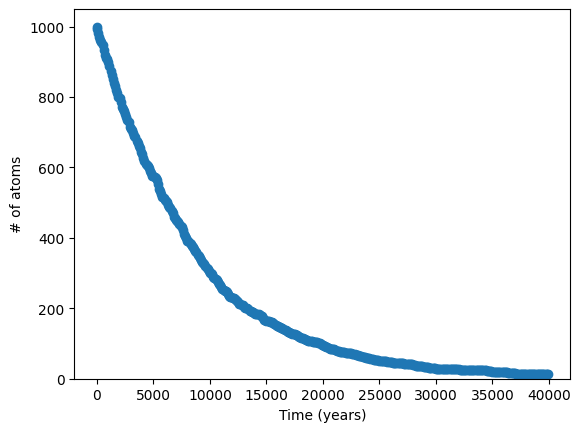

In [53]:
# TODO: Make an array of 1000 ones for our isotopes
isotopes = np.ones(1000)

# TODO: Create a list N to track the number of surviving isotopes
N = []

# TODO: append the intial number of isotopes into the list N
N.append(len(isotopes))

# TODO: enter the equation for the probability that
# one atom will decay in 100 yrs
t=100
tau=8270
prob = 1-np.e**(-t/tau)
print(prob)

tfinal = 40000 # Years
tsteps = 100 # This is what we used to calculate the probability

# We'll use this to keep track of the time passed
xpts = []
xpts.append(0)

# For our loop we're going in steps of 100 years.
for t in np.arange(0,tfinal,tsteps):

  xpts.append(t)

  # Keep track of the time here
  for i in range(len(isotopes)):

    if isotopes[i] == 1: # Meaning it did not decay yet
      if does_it_decay(prob)==True:
        isotopes[i] = 0

  N.append(sum(isotopes))

plt.figure()
plt.plot(xpts,N,"o")
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Number of atoms remaining');
plt.ylim(0)
plt.xlabel('Time (years)')
plt.ylabel('# of atoms');

Woo-hoo!

Now, as we said, the $^{14}C$ doesn't just vanish, it turns into $^{14}N$ and other stuff. So if we started with 1000 atoms of $^{14}C$ and nothing else, we could also keep track of the number of $^{14}N$ we have.

Note that we'll define new variables for the nitrogen and rename our isotopes variables to keep track of things.

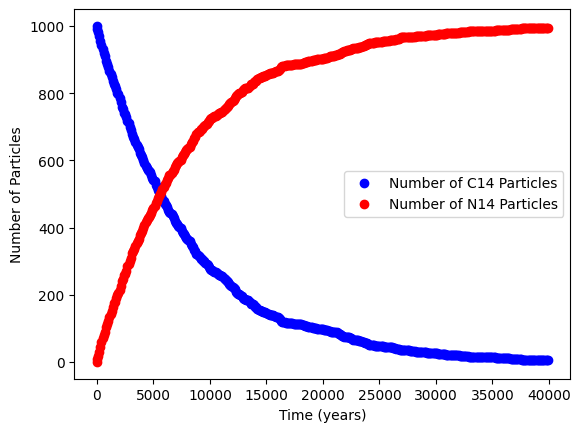

In [58]:
# create an array of 1000 ones to track the decay rate of 1000 C14 atoms
C14 =np.ones(1000)

# This will track the number of Nitrogen atoms
N14 = []

# TODO : create an empty list called num_C14
num_C14 = []

# TODO : create an empty list called num_N14
num_N14 = []

# TODO: append the intial value for the total number of C14 atoms
num_C14.append(len(C14))

# TODO: append the initial value for the total number N14 atoms
num_N14.append(0)

# We'll use this to keep track of the time passed
tpts = []
tpts.append(0)

# For our loop we're going in steps of 100 years.
for t in np.arange(0,tfinal,tsteps):

  tpts.append(t)

  for i in range(len(C14)):

    if C14[i] == 1: # Meaning it did not decay yet
      if does_it_decay(prob)==True:
        C14[i] = 0
        N14.append(1)

  # TODO: append the total number of surviving C14 to num_C14
  num_C14.append(sum(C14))
  # TODO: append the total number of N14 to num_N14
  num_N14.append(sum(N14))
plt.figure()

# TODO: plot num_C14 vs tpts
plt.plot(tpts,num_C14,'bo',label='Number of C14 Particles')

# TODO: plot num_N14 vs tpts
plt.plot(tpts,num_N14,'ro',label='Number of N14 Particles')
# TODO: label your axes
plt.xlabel('Time (years)')
plt.ylabel('Number of Particles')

# TODO: add a legend
plt.legend()

You can see that the number of $^{14}N$ isotopes grows as the number of $^{14}C$ is decreasing, as the latter is turning into the former.

Note that with this, we could answer questions like the ratio of $^{14}N/ ^{14}C$ after 5000 years and 20000 years. We're going in steps of 100, so that would be the values in the 50th and 200th entry of the ```num_``` lists.

In [55]:
# After 5000 years

nC14 = num_C14[50]
nN14 = num_N14[50]

print("After 500 years, the ratio of N14/C14 is {0:.2f}".format(nN14/nC14))


# After 20000 years

nC14 = num_C14[200]
nN14 = num_N14[200]

print("After 2000 years, the ratio of N14/C14 is {0:.2f}".format(nN14/nC14))

After 500 years, the ratio of N14/C14 is 0.82
After 2000 years, the ratio of N14/C14 is 12.33


$^{14}N$ is very common in the atmosphere, so you wouldn't necessarily use these ratios to date samples. But this approach to looking at the ratios of isotopes and their decay products *is* used in some geologic dating processes.